In [1]:
import tensorflow as tf                   #tensorflow is Google's free deep learning library
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

ImportError: No module named tensorflow

In [2]:
# This is some example code from https://www.tensorflow.org/get_started/mnist/beginners
# MNIST is a standard dataset of hand-written images that we can train a neural net to learn

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images[1]  #this shows that a single example is just one long row of numbers

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [4]:
import matplotlib.pyplot as plt        # just loading some libraries so we can look at stuff
%matplotlib inline

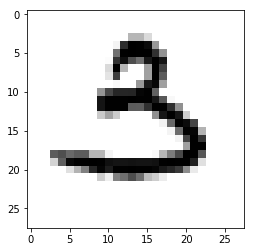

In [5]:
im1 = mnist.train.images[152]          #picking a random training image
myim=[]
for row in range(0,28):                # this reformats a long row of 28*28 numbers into a 
    newrow=im1[row*28:row*28+28]       # matrix of 28 rows and 28 columns of numbers, so we can
    myim.append(newrow)                # visualize the image
plt.imshow(myim,cmap='gray_r')

In [6]:
mnist.train.labels[152]               #labels shows the actual number
#below there is a 0 in every position 0,1,2,4,5,6,7,8,9
#and a 1 in position 3, indicating that the image above is supposed to be a 3

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

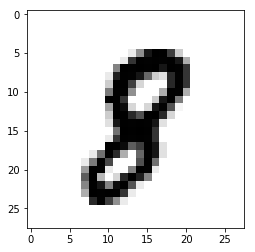

In [7]:
# let's try another example
im1 = mnist.train.images[781]          #picking a random training image
myim=[]
for row in range(0,28):                # this reformats a long row of 28*28 numbers into a 
    newrow=im1[row*28:row*28+28]       # matrix of 28 rows and 28 columns of numbers, so we can
    myim.append(newrow)                # visualize the image
plt.imshow(myim,cmap='gray_r')

In [8]:
mnist.train.labels[781]    #below there is a 1 in position 8 and 0's everywhere else

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [9]:
#this sets up a neural net
x = tf.placeholder(tf.float32, [None, 784])  # 784 inputs, one for each of the 28*28 (=784) pixels
W = tf.Variable(tf.zeros([784, 10]))         # 10 neurons (one per digit) each with 784 weights
b = tf.Variable(tf.zeros([10]))              
y = tf.nn.softmax(tf.matmul(x, W) + b)       # y is the neural net's prediction
y_ = tf.placeholder(tf.float32, [None, 10])  # y_ is a placeholder for the actual right digit
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()               # the lines above define how to measure goodness and
tf.global_variables_initializer().run()        # how to iteratively get better over time
for iteration in range(1000):                # so repeat 1000 times
    batch_xs, batch_ys = mnist.train.next_batch(100)  # get the next 100 training examples
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})  # train on these examples
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))  # get a list of right(1)/wrong(0)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # accuracy is average of list
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})) #print it

0.4075
0.4029
0.4927
0.5023
0.6827
0.4972
0.7257
0.7076
0.6808
0.7821
0.7311
0.7984
0.7478
0.7959
0.816
0.8162
0.8256
0.8379
0.8455
0.7874
0.8062
0.8478
0.8206
0.8508
0.8498
0.8481
0.8395
0.83
0.8551
0.8696
0.8515
0.8429
0.8581
0.8546
0.8602
0.8588
0.8337
0.8494
0.7981
0.8557
0.869
0.8695
0.8684
0.8542
0.8672
0.8553
0.8643
0.8606
0.8672
0.8609
0.8725
0.8744
0.8247
0.8613
0.8773
0.878
0.875
0.8757
0.8839
0.8809
0.8772
0.876
0.869
0.8794
0.8745
0.8747
0.8716
0.8671
0.8655
0.8604
0.8629
0.8495
0.8724
0.8746
0.8797
0.8577
0.8707
0.884
0.8814
0.8832
0.8829
0.8853
0.8755
0.8857
0.8859
0.8867
0.8852
0.8861
0.8859
0.8828
0.882
0.8854
0.8876
0.8814
0.891
0.887
0.8672
0.8766
0.889
0.8943
0.8948
0.8874
0.8916
0.8873
0.8921
0.8949
0.8937
0.8975
0.8949
0.8974
0.896
0.8949
0.898
0.8961
0.8835
0.8928
0.8958
0.8973
0.8966
0.8978
0.8975
0.9004
0.9016
0.8948
0.888
0.8931
0.8975
0.8892
0.9007
0.8963
0.8966
0.9003
0.8919
0.896
0.8806
0.8977
0.8994
0.899
0.9019
0.8988
0.9014
0.9003
0.8959
0.9031
0.9001
0.8

In [10]:
# the accuracy grows from 40% to 92% pretty quickly, indicating that the neural net 
# is now correctly reading 92% of the digits 